In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# initial conditions

# Domain parameter
L = 1          # Length of the plate in x-direction
H = 2          # Length of the plate in y-direction
IM = 41        # Number of grid points in x-direction
JM = 81        # Number of grid points in y-direction

delta_x = L / (IM - 1) # Step change in x direction
delta_y = H / (JM - 1) # Step change in y direction

beta = delta_x/ delta_y # variation in x direction by variation in y direction
alpha = 2 * (1 + beta**2) # coefficient

r = ((np.cos(np.pi / (IM - 1)) + (beta**2) * np.cos(np.pi / (JM - 1))) / (alpha / 2))**2

omega_opt = (2 - 2 * np.sqrt(1 - r)) / 2 #parameter


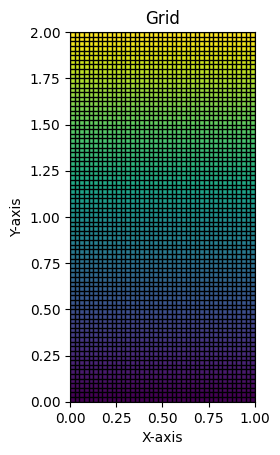

In [106]:
# grid points

# Plot grid lines along x-axis
for i in range(JM + 1):
    plt.plot([0, L], [i * delta_y, i * delta_y], color='black', linestyle='-', linewidth=1)

# Plot grid lines along y-axis
for j in range(IM + 1):
    plt.plot([j * delta_x, j * delta_x], [0, H], color='black', linestyle='-', linewidth=1)

plt.imshow(a, cmap='viridis', extent=[0, L, 0, H], origin='lower')
plt.title('Grid')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


Converged after 2280 iterations.


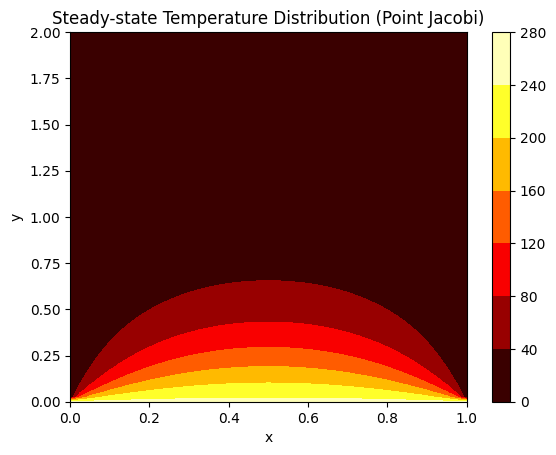

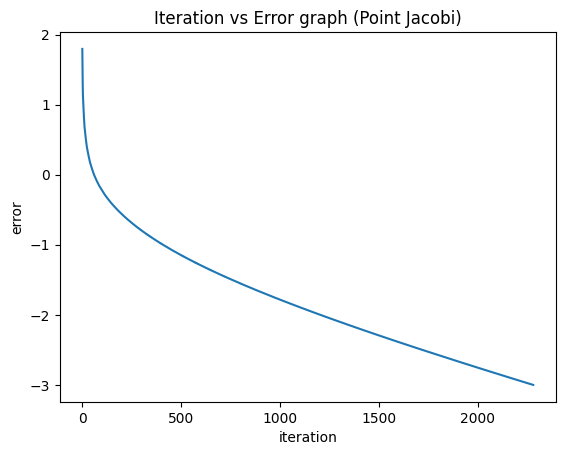

In [107]:
# point jacobi method

# Initialize temperature distribution
Tpj = np.zeros((JM, IM))  # Initial temperature distribution

# Dirichlet boundary conditions
Tpj[:, 0] = 0  # Left boundary temperature
Tpj[:, -1] = 0   # Right boundary temperature
Tpj[0, :] = 250  # Bottom boundary temperature
Tpj[-1, :] = 0  # Top boundary temperature

iterations_pj=[] # Empty array for iteration
errors_pj=[] # Empty array for iteration

# Implement Point Jacobi iterative method
def laplace_point_jacobi(Tpj, max_iterations=5000, error=1e-3): # This run for maximum iteration 5000 and erroe 1e-3
    for iteration in range(max_iterations): # Iteration loop
        Tpj_i = Tpj.copy()
        for i in range(1, JM-1): # Loop run in y direction points
            for j in range(1, IM-1): # Loop run in x direction points
                Tpj[i, j] = (1/alpha) *(Tpj_i[i-1, j] + Tpj_i[i+1, j] + (beta**2) * Tpj_i[i, j-1] +(beta**2) * Tpj_i[i, j+1]) # Formula for point jecobi


        max_diff = np.max(np.abs(Tpj - Tpj_i)) # Difference between new and old value of temprature in array

        iterations_pj.append(iteration + 1) # Store iterations
        errors_pj.append(max_diff) # Store error
        if max_diff < error: # Condition of convergence
            print(f"Converged after {iteration+1} iterations.")
            break
    return Tpj,iteration+1 # Return the value of temprature and iterations

# Solve the Laplace equation using Point Jacobi method
Tpj,iteration = laplace_point_jacobi(Tpj)


# Visualize the temperature distribution
P = np.linspace(0, L, IM)
Q = np.linspace(0, H, JM)
X, Y = np.meshgrid(P, Q)


plt.contourf(X, Y, Tpj, cmap='hot') # Temprature distribution over flat plat
plt.colorbar()
plt.title('Steady-state Temperature Distribution (Point Jacobi)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(iterations_pj, np.log10(errors_pj), label='Point Jacobi') # Iterations vs error graph
plt.title('Iteration vs Error graph (Point Jacobi)')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()



Converged after 1298 iterations.


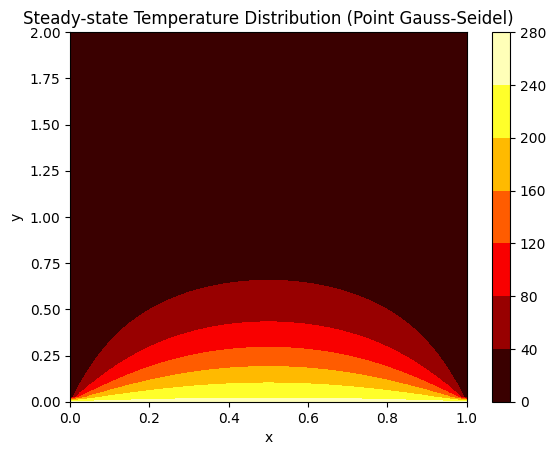

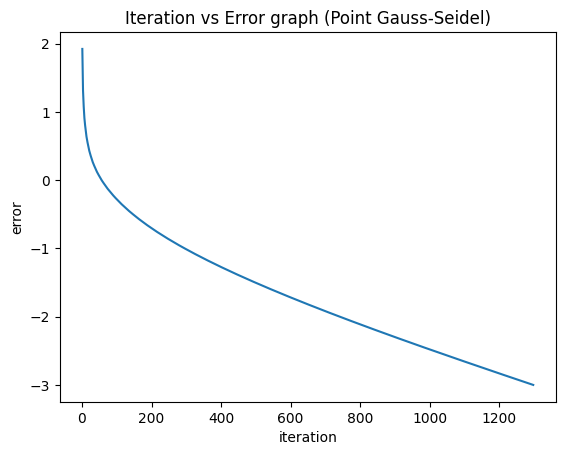

In [108]:
# Point Gauss-Seidel

# Initialize temperature distribution
Tgs = np.zeros((JM, IM))  # Initial temperature distribution

# Dirichlet boundary conditions
Tgs[:, 0] = 0  # Left boundary temperature
Tgs[:, -1] = 0   # Right boundary temperature
Tgs[0, :] = 250  # Bottom boundary temperature
Tgs[-1, :] = 0  # Top boundary temperature

iterations_pgs=[] # Empty array for iteration
errors_pgs=[] # Empty array for iteration

# Implement Point Gauss-Seidel method
def laplace_point_Gauss_Seidel(Tgs, max_iterations=5000, error=1e-3): # This run for maximum iteration 5000 and erroe 1e-3
    for iteration in range(max_iterations): # Iteration loop
        Tgs_i = Tgs.copy()
        for i in range(1, JM-1): # Loop run in y direction points
            for j in range(1, IM-1): # Loop run in x direction points
                Tgs[i, j] = (1/alpha) *(Tgs[i-1, j] + Tgs_i[i+1, j] + (beta**2) * Tgs[i, j-1] +(beta**2) * Tgs_i[i, j+1]) # Formula for point Gauss-Seidel method


        max_diff = np.max(np.abs(Tgs - Tgs_i)) # Difference between new and old value of temprature in array

        iterations_pgs.append(iteration + 1) # Store iterations
        errors_pgs.append(max_diff) # Store error


        if max_diff < error: # Condition of convergence

            print(f"Converged after {iteration+1} iterations.")
            break
    return Tgs,iteration+1

# Solve the Laplace equation using Point Gauss seidel method
Tgs,iteration = laplace_point_Gauss_Seidel(Tgs)

# Visualize the temperature distribution
P = np.linspace(0, L, IM)
Q = np.linspace(0, H, JM)
X, Y = np.meshgrid(P, Q)

plt.contourf(X, Y, Tgs, cmap='hot') # Temprature distribution over flat plate
plt.colorbar()
plt.title('Steady-state Temperature Distribution (Point Gauss-Seidel)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(iterations_pgs, np.log10(errors_pgs), label='Point Gauss seidel') # Iterations vs error graph
plt.title('Iteration vs Error graph (Point Gauss-Seidel)')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()



Converged after 513 iterations.


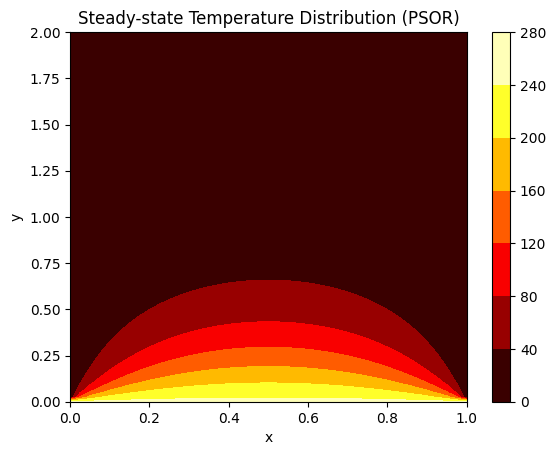

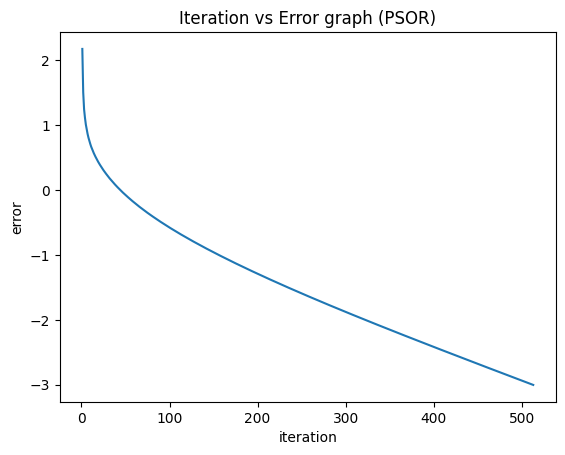

In [109]:
# Point Succesive Over Relaxation (PSOR)

# Initialize temperature distribution
Tpsor = np.zeros((JM, IM))  # Initial temperature distribution
omega=1.5 # relaxation parameter

# Dirichlet boundary conditions
Tpsor[:, 0] = 0  # Left boundary temperature
Tpsor[:, -1] = 0   # Right boundary temperature
Tpsor[0, :] = 250  # Bottom boundary temperature
Tpsor[-1, :] = 0  # Top boundary temperature

iterations_psor=[] # Empty array for iteration
errors_psor=[] # Empty array for iteration

# Implement Point Succesive Over Relaxation method
def laplace_PSOR(Tpsor, max_iterations=5000, error=1e-3): # This run for maximum iteration 5000 and erroe 1e-3
    for iteration in range(max_iterations): # Iteration loop
        Tpsor_i = Tpsor.copy()
        for i in range(1, JM-1): # Loop run in y direction points
            for j in range(1, IM-1): # Loop run in x direction points
                Tpsor[i, j] = ((1-omega)*Tpsor_i[i, j])+(omega/alpha) *(Tpsor[i-1, j] + Tpsor_i[i+1, j] + (beta**2) * Tpsor[i, j-1] +(beta**2) * Tpsor_i[i, j+1]) # Formula for Point Succesive Over Relaxation method


        max_diff = np.max(np.abs(Tpsor - Tpsor_i)) # Difference between new and old value of temprature in array

        iterations_psor.append(iteration + 1) # Store iterations
        errors_psor.append(max_diff) # Condition of convergence

        if max_diff < error:
            print(f"Converged after {iteration+1} iterations.")
            break
    return Tpsor,iteration+1 # Return the value of temprature and iterations



# Solve the Laplace equation using Point Succesive Over Relaxation
Tpsor,iteration = laplace_PSOR(Tpsor)

# Visualize the temperature distribution
P = np.linspace(0, L, IM)
Q = np.linspace(0, H, JM)
X, Y = np.meshgrid(P, Q)

plt.contourf(X, Y, Tpsor, cmap='hot') # Temprature distribution over flat plate
plt.colorbar()
plt.title('Steady-state Temperature Distribution (PSOR)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(iterations_psor, np.log10(errors_psor), label='Point Succesive Over Relaxation') # Iterations vs error graph
plt.title('Iteration vs Error graph (PSOR)')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()



Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.


<ipython-input-110-0cae80124499>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  T_exact = 250 *(2 / np.pi)* np.sum( ((1 - (-1) ** n) / n) * (np.sinh(n * np.pi * (H - y) / L) * np.sin(n * np.pi * x / L)) / np.sinh(n * np.pi * H / L) for n in range(1, 4))


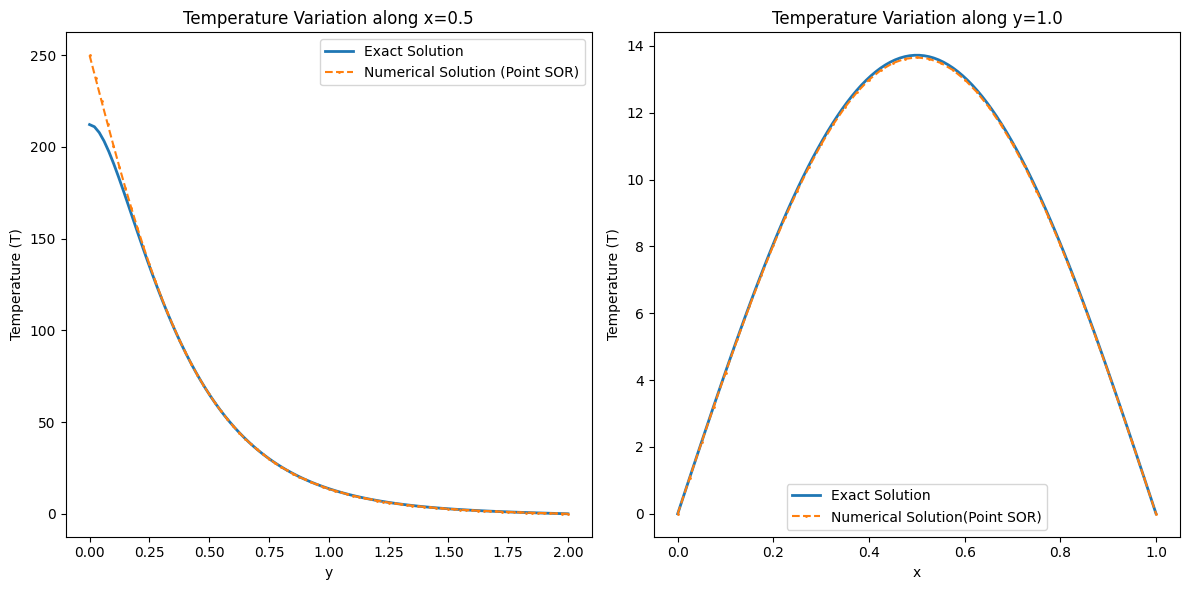

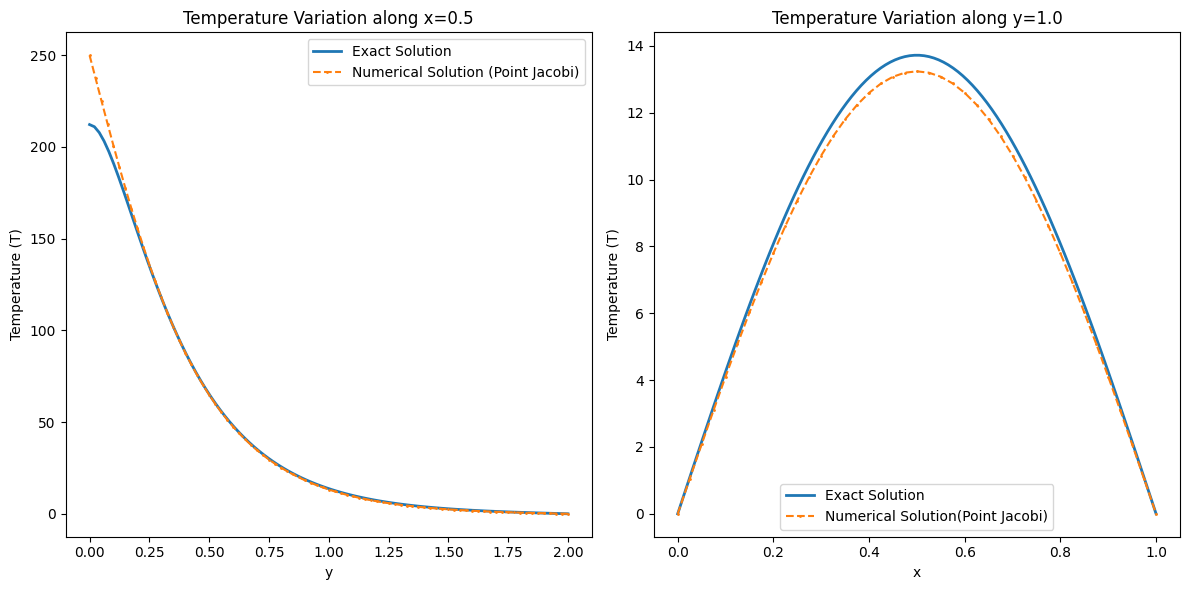

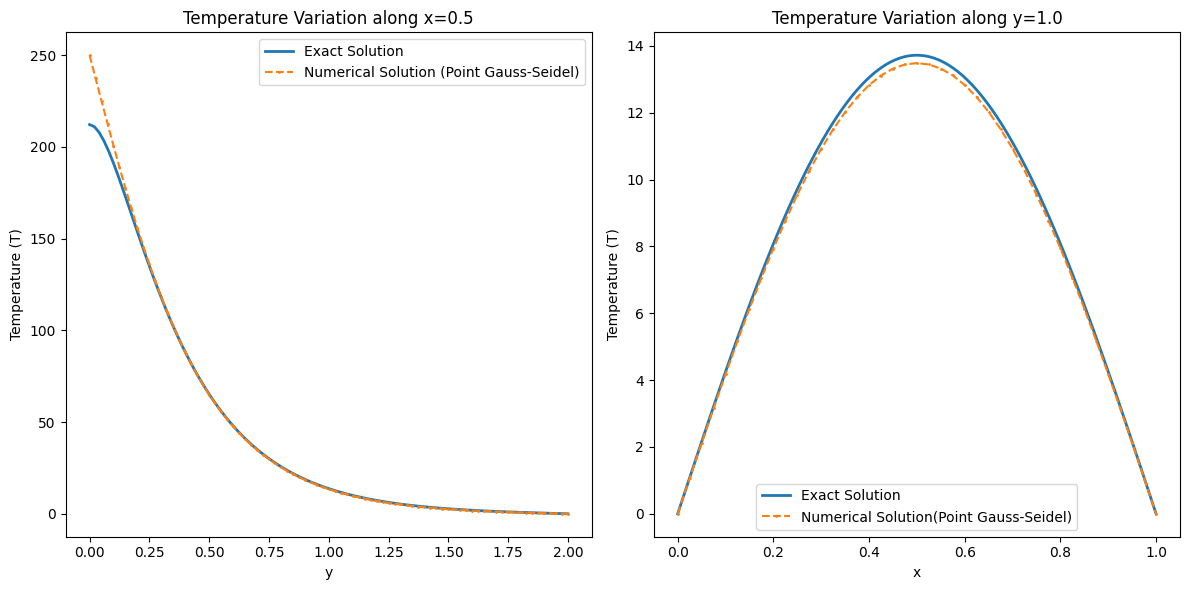

In [110]:
#Variations of temperature T along the midlin
Tpsor,iteration = laplace_PSOR(Tpsor) # For example temprature distribution by Point Succesive Over Relaxation
Tpj,iteration = laplace_point_jacobi(Tpj)
Tgs,iteration = laplace_point_Gauss_Seidel(Tgs)

#  functions to calculate exact solution and numerical solution along midlines

def exact_solution(x, y, L, H): # exact solution
    # function to calculate exact solution T(x, y)
    T_exact = 250 *(2 / np.pi)* np.sum( ((1 - (-1) ** n) / n) * (np.sinh(n * np.pi * (H - y) / L) * np.sin(n * np.pi * x / L)) / np.sinh(n * np.pi * H / L) for n in range(1, 4))


    return T_exact

def numerical_solution_x(T, JM, IM): # Numerical solution along x
    # function to extract numerical solution along x = 0.5 midline
    T_x_midline = T[:, int((IM-1)/2)]
    return T_x_midline

def numerical_solution_y(T,JM, IM): # Numerical solution along y
    # function to extract numerical solution along y = 1.0 midline
    T_y_midline = T[int((JM-1)/2), :]
    return T_y_midline

for T, T_name in zip((Tpsor, Tpj, Tgs), ('Point SOR', 'Point Jacobi', 'Point Gauss-Seidel')):

  # Calculate the exact and numerical solutions
  x_midline_exact = np.linspace(0, L, 100)  # x values along the midline
  T_exact_x_midline = exact_solution(0.5, np.linspace(0, H, 100), L, H)  # exact solution along x = 0.5 midline
  T_numerical_x_midline = numerical_solution_x(T, JM, IM)  # numerical solution along x = 0.5 midline

  y_midline_exact = np.linspace(0, H, 100)  # y values along the midline
  T_exact_y_midline = exact_solution(np.linspace(0, L, 100), 1.0, L, H)  # exact solution along y = 1.0 midline
  T_numerical_y_midline = numerical_solution_y(T, JM, IM)  # numerical solution along y = 1.0 midline

  # Plot the variations of temperature along the midlines
  plt.figure(figsize=(12, 6))

  # Plot for x = 0.5 midline
  plt.subplot(1, 2, 1)
  plt.plot(y_midline_exact,T_exact_x_midline,  label='Exact Solution', linewidth=2)
  plt.plot(np.linspace(0, H, JM), T_numerical_x_midline, label=f'Numerical Solution ({T_name})', linestyle='--', marker='o',markersize=1)
  plt.xlabel('y')
  plt.ylabel('Temperature (T)')
  plt.title('Temperature Variation along x=0.5')
  plt.legend()

  # Plot for y = 1.0 midline
  plt.subplot(1, 2, 2)
  plt.plot(x_midline_exact, T_exact_y_midline, label='Exact Solution', linewidth=2)
  plt.plot(np.linspace(0, L, IM), T_numerical_y_midline, label=f'Numerical Solution({T_name})', linestyle='--', marker='o',markersize=1)
  plt.xlabel('x')
  plt.ylabel('Temperature (T)')
  plt.title('Temperature Variation along y=1.0')
  plt.legend()

  plt.tight_layout()
  plt.show()
